The dataset is loaded into a pandas DataFrame for manipulation and analysis.

In [1]:
# Load the dataset
import pandas as pd
dataset = pd.read_csv('../data/dataset.csv')
print(dataset)

       schoolid  Z         Y  S3  C1  C2  C3  XC        X1        X2  \
0            76  1  0.081602   6   4   2   1   4  0.334544  0.648586   
1            76  1 -0.385869   4  12   2   1   4  0.334544  0.648586   
2            76  1  0.398184   6   4   2   0   4  0.334544  0.648586   
3            76  1 -0.175037   6   4   2   0   4  0.334544  0.648586   
4            76  1  0.884583   6   4   1   0   4  0.334544  0.648586   
...         ... ..       ...  ..  ..  ..  ..  ..       ...       ...   
10386         1  0  0.423366   7   4   2   1   3  1.185986 -1.129889   
10387         1  0 -0.197092   7   4   2   1   3  1.185986 -1.129889   
10388         1  0  0.141698   2  15   1   1   3  1.185986 -1.129889   
10389         1  0 -0.351565   5   4   1   1   3  1.185986 -1.129889   
10390         1  0  0.211240   5   1   2   1   3  1.185986 -1.129889   

             X3        X4        X5  
0     -1.310927  0.224077 -0.426757  
1     -1.310927  0.224077 -0.426757  
2     -1.310927  0.22

Columns are renamed to more descriptive names for clarity.

In [2]:
data = dataset.rename(columns={
        'Y': 'StudentAchievementScore',
        'Z': 'GrowthMindsetIntervention',
        'S3': 'FutureSuccessExpectations',
        'C1': 'StudentRaceEthnicity',
        'C2': 'StudentGender',
        'C3': 'FirstGenCollegeStatus',
        'XC': 'SchoolUrbanicity',
        'X1': 'PreInterventionFixedMindset',
        'X2': 'SchoolAchievementLevel',
        'X3': 'SchoolMinorityComposition',
        'X4': 'PovertyConcentration',
        'X5': 'TotalStudentPopulation'
    })
print(data)

       schoolid  GrowthMindsetIntervention  StudentAchievementScore  \
0            76                          1                 0.081602   
1            76                          1                -0.385869   
2            76                          1                 0.398184   
3            76                          1                -0.175037   
4            76                          1                 0.884583   
...         ...                        ...                      ...   
10386         1                          0                 0.423366   
10387         1                          0                -0.197092   
10388         1                          0                 0.141698   
10389         1                          0                -0.351565   
10390         1                          0                 0.211240   

       FutureSuccessExpectations  StudentRaceEthnicity  StudentGender  \
0                              6                     4              2   
1

The dataset is split into treated and control groups based on the 'GrowthMindsetIntervention' column.

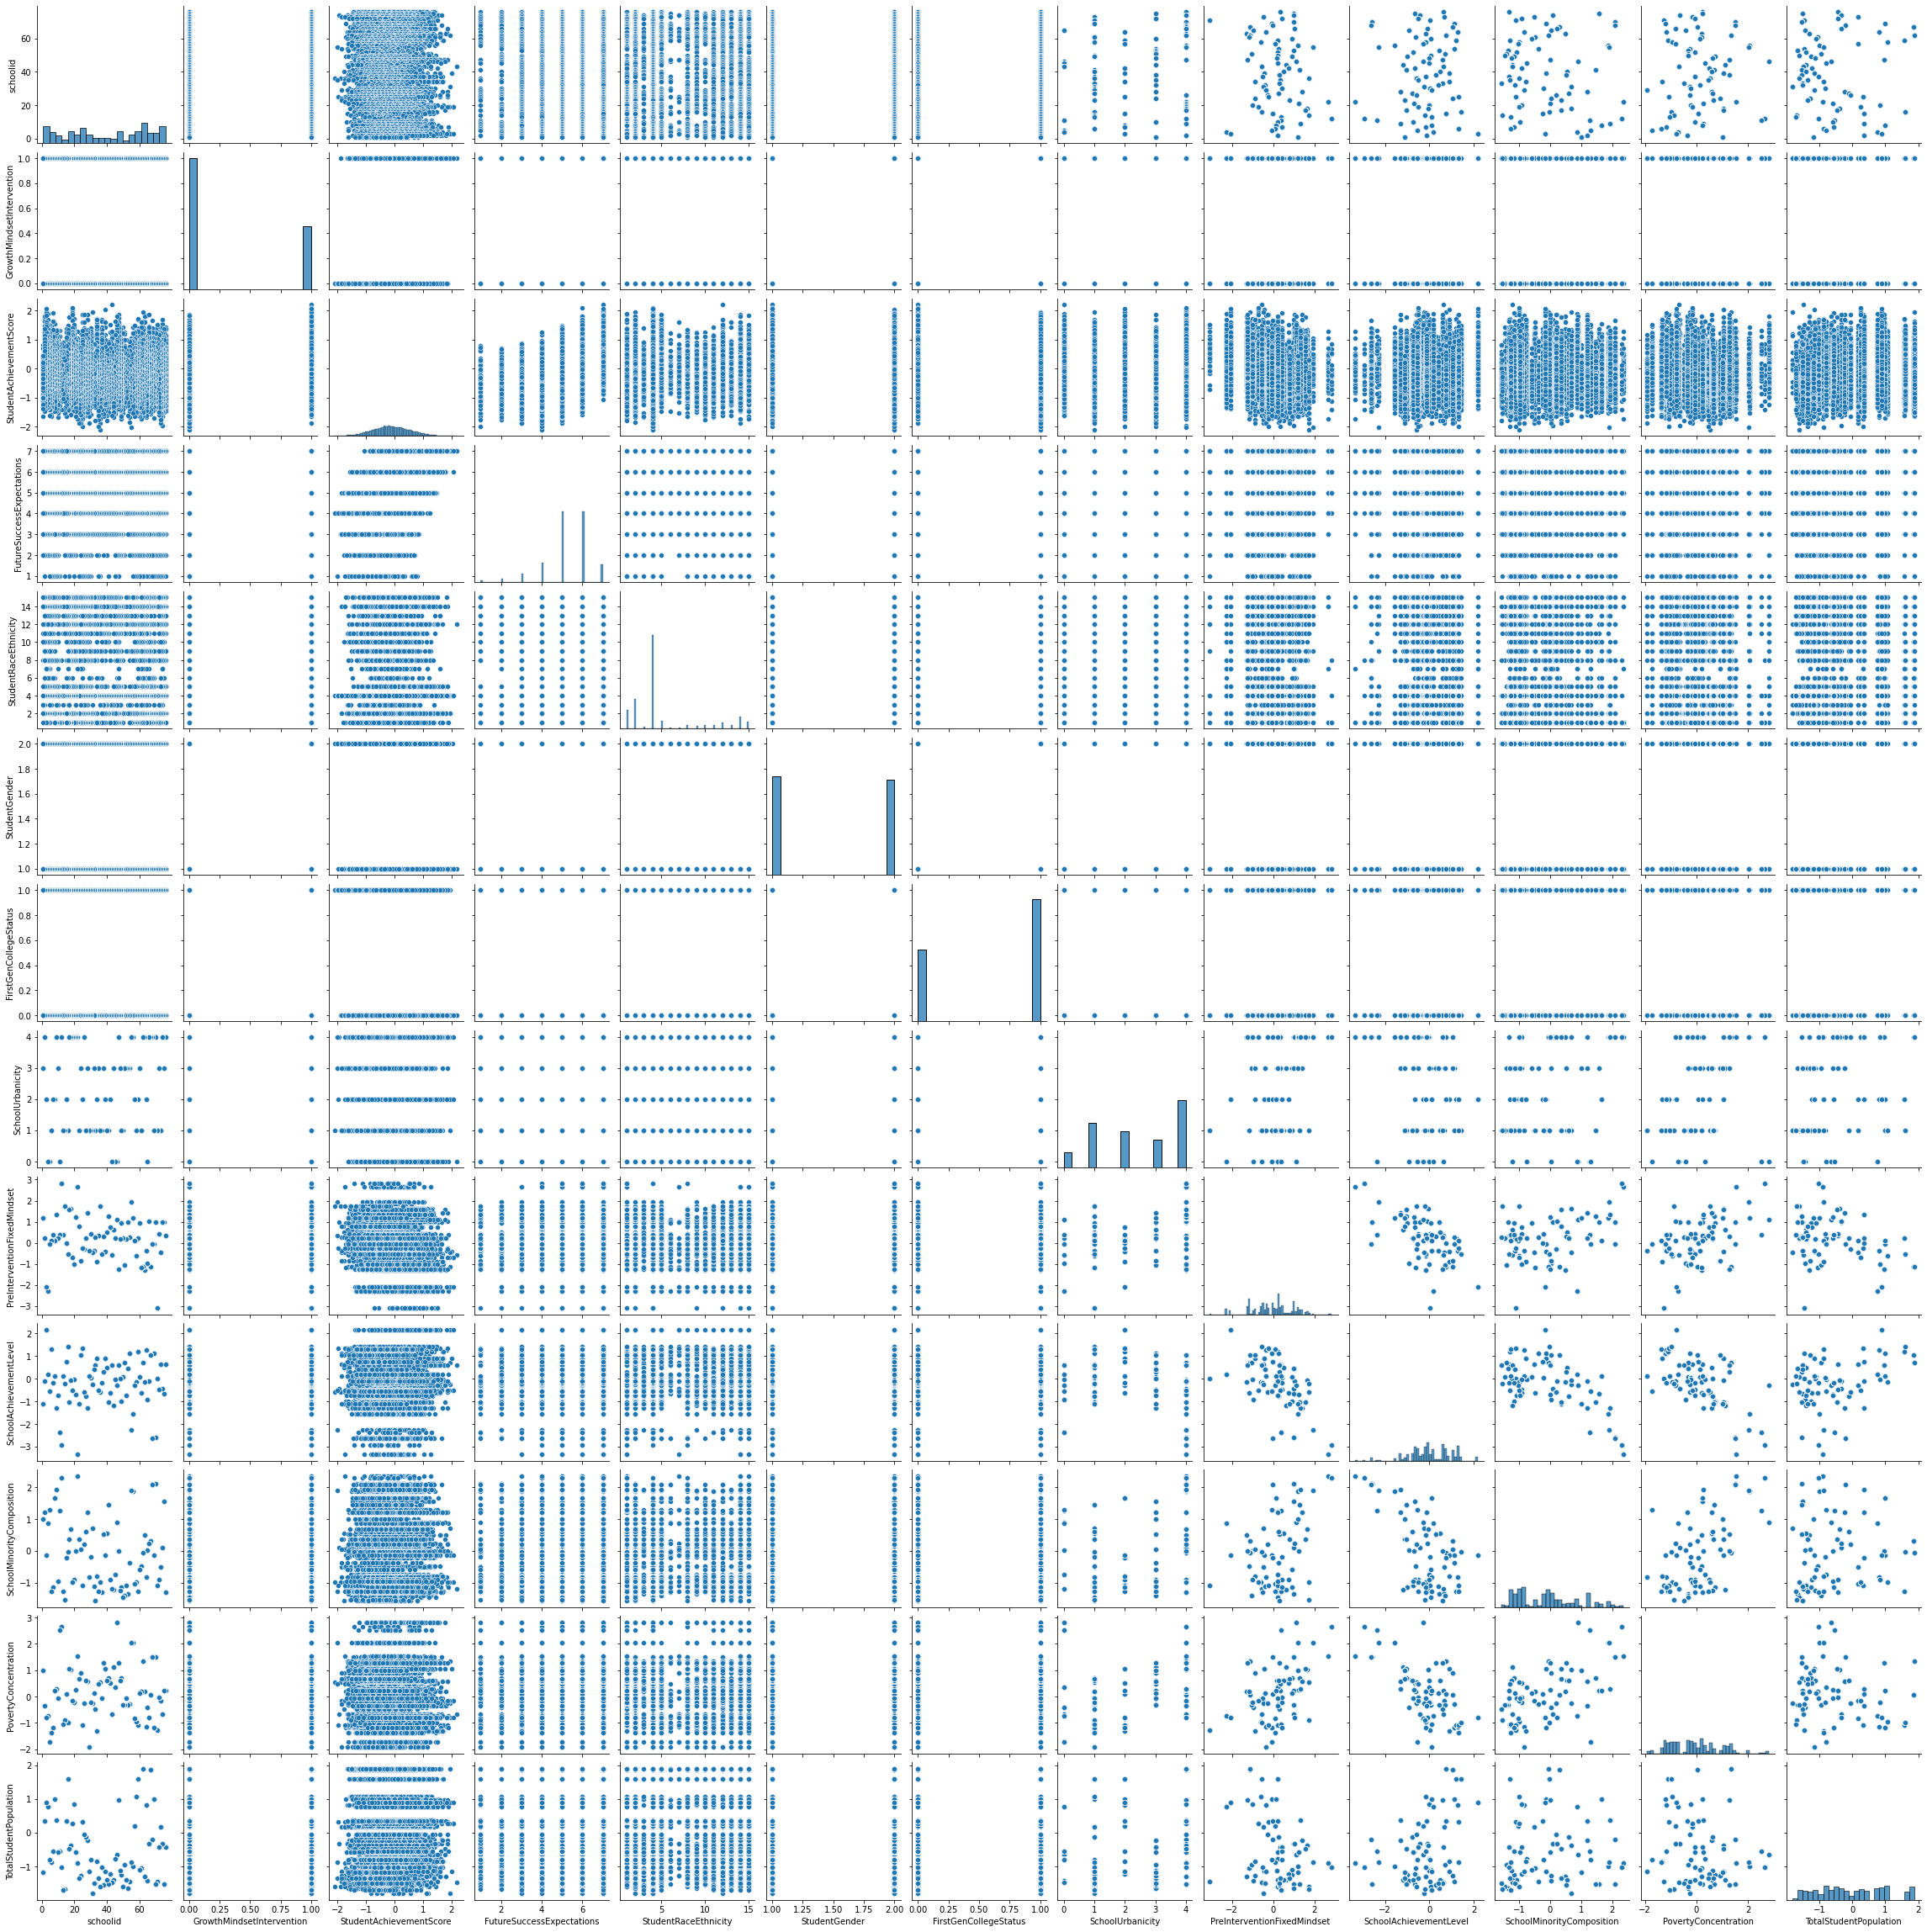

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data)
plt.show()


In [23]:
# Select the relevant columns (continuous variables)
continuous_vars = ['StudentAchievementScore', 'FutureSuccessExpectations', 'PreInterventionFixedMindset', 'SchoolAchievementLevel', 'SchoolMinorityComposition', 'PovertyConcentration', 'TotalStudentPopulation']
categorical_variables = ['StudentRaceEthnicity','StudentGender','FirstGenCollegeStatus','SchoolUrbanicity']
print(data[categorical_variables])


       StudentRaceEthnicity  StudentGender  FirstGenCollegeStatus  \
0                         4              2                      1   
1                        12              2                      1   
2                         4              2                      0   
3                         4              2                      0   
4                         4              1                      0   
...                     ...            ...                    ...   
10386                     4              2                      1   
10387                     4              2                      1   
10388                    15              1                      1   
10389                     4              1                      1   
10390                     1              2                      1   

       SchoolUrbanicity  
0                     4  
1                     4  
2                     4  
3                     4  
4                     4  
...            

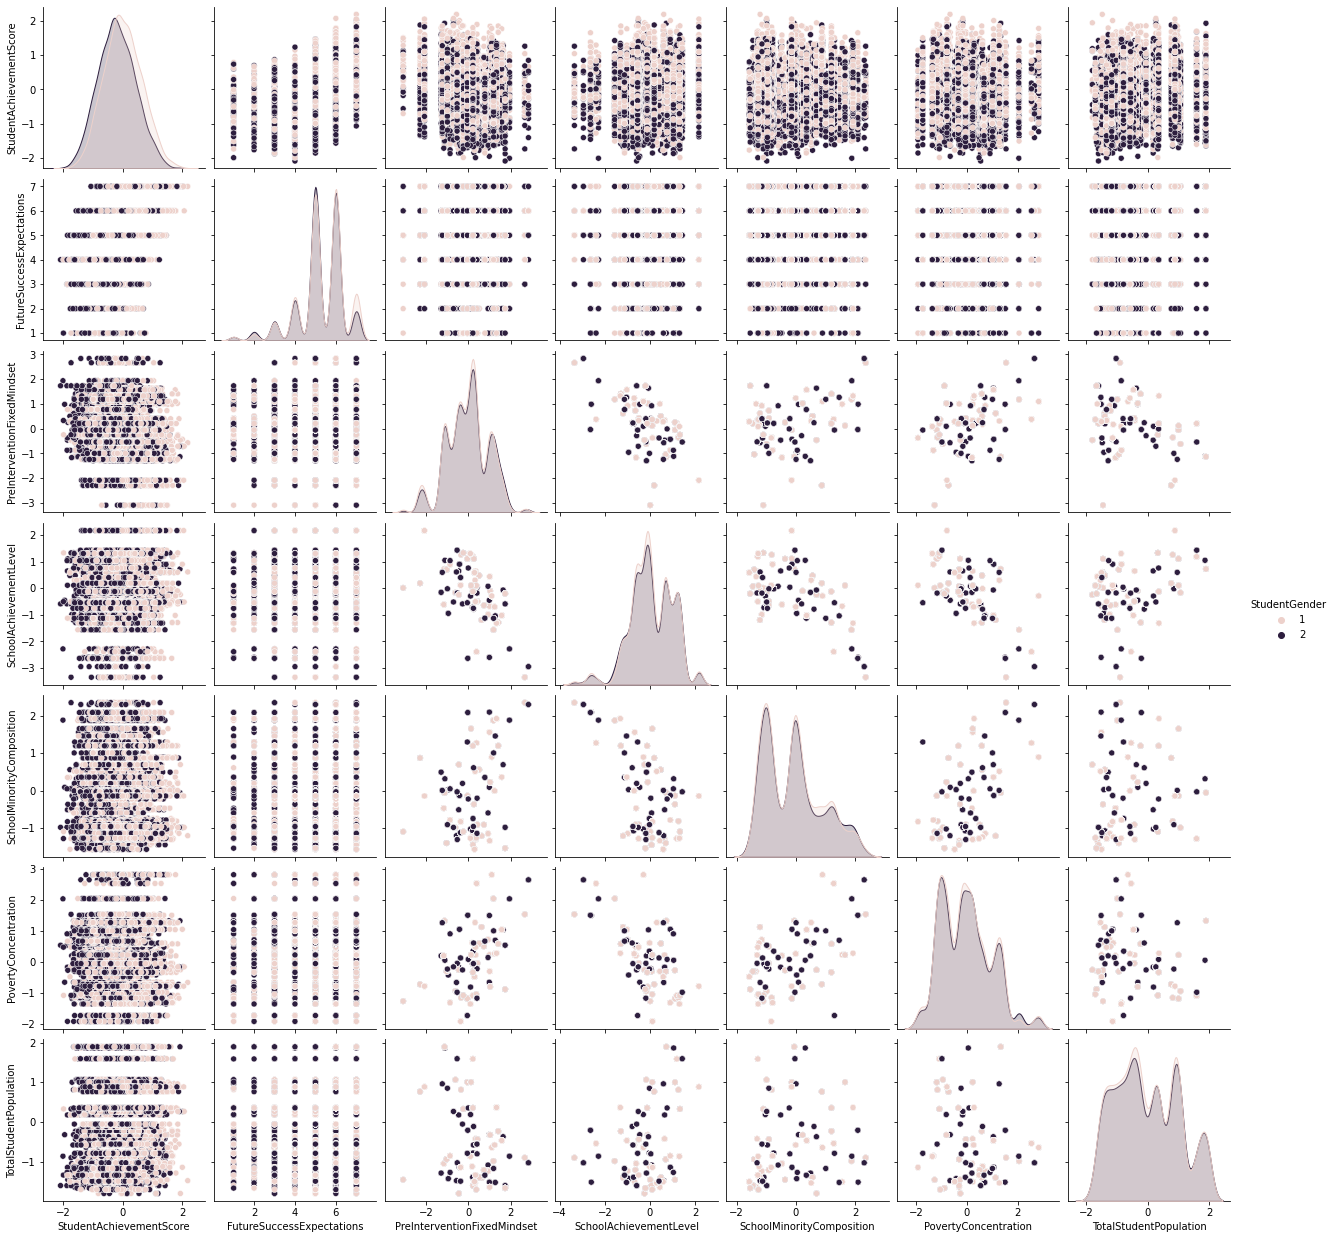

In [22]:
# Pairplot with hue for a categorical variable, e.g., 'C1' (student race/ethnicity)
sns.pairplot(data, vars=continuous_vars, hue='StudentGender')
plt.show()

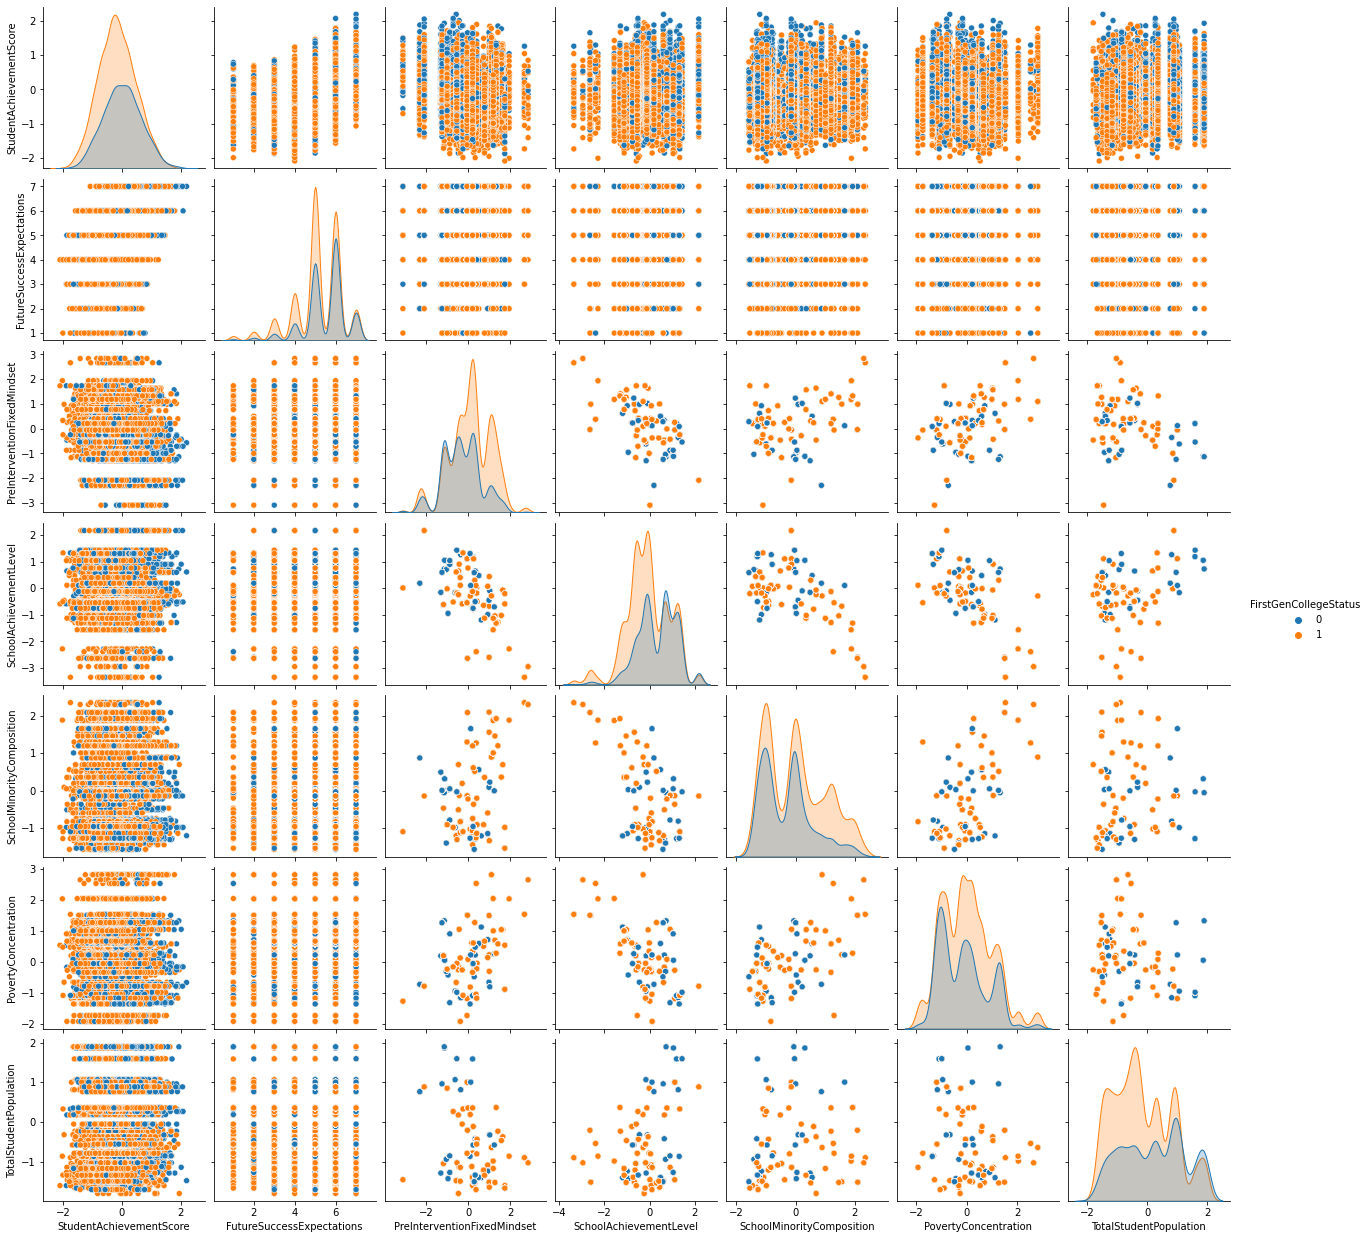

In [24]:
# Pairplot with hue for a categorical variable, e.g., 'C1' (student race/ethnicity)
sns.pairplot(data, vars=continuous_vars, hue='FirstGenCollegeStatus')
plt.show()

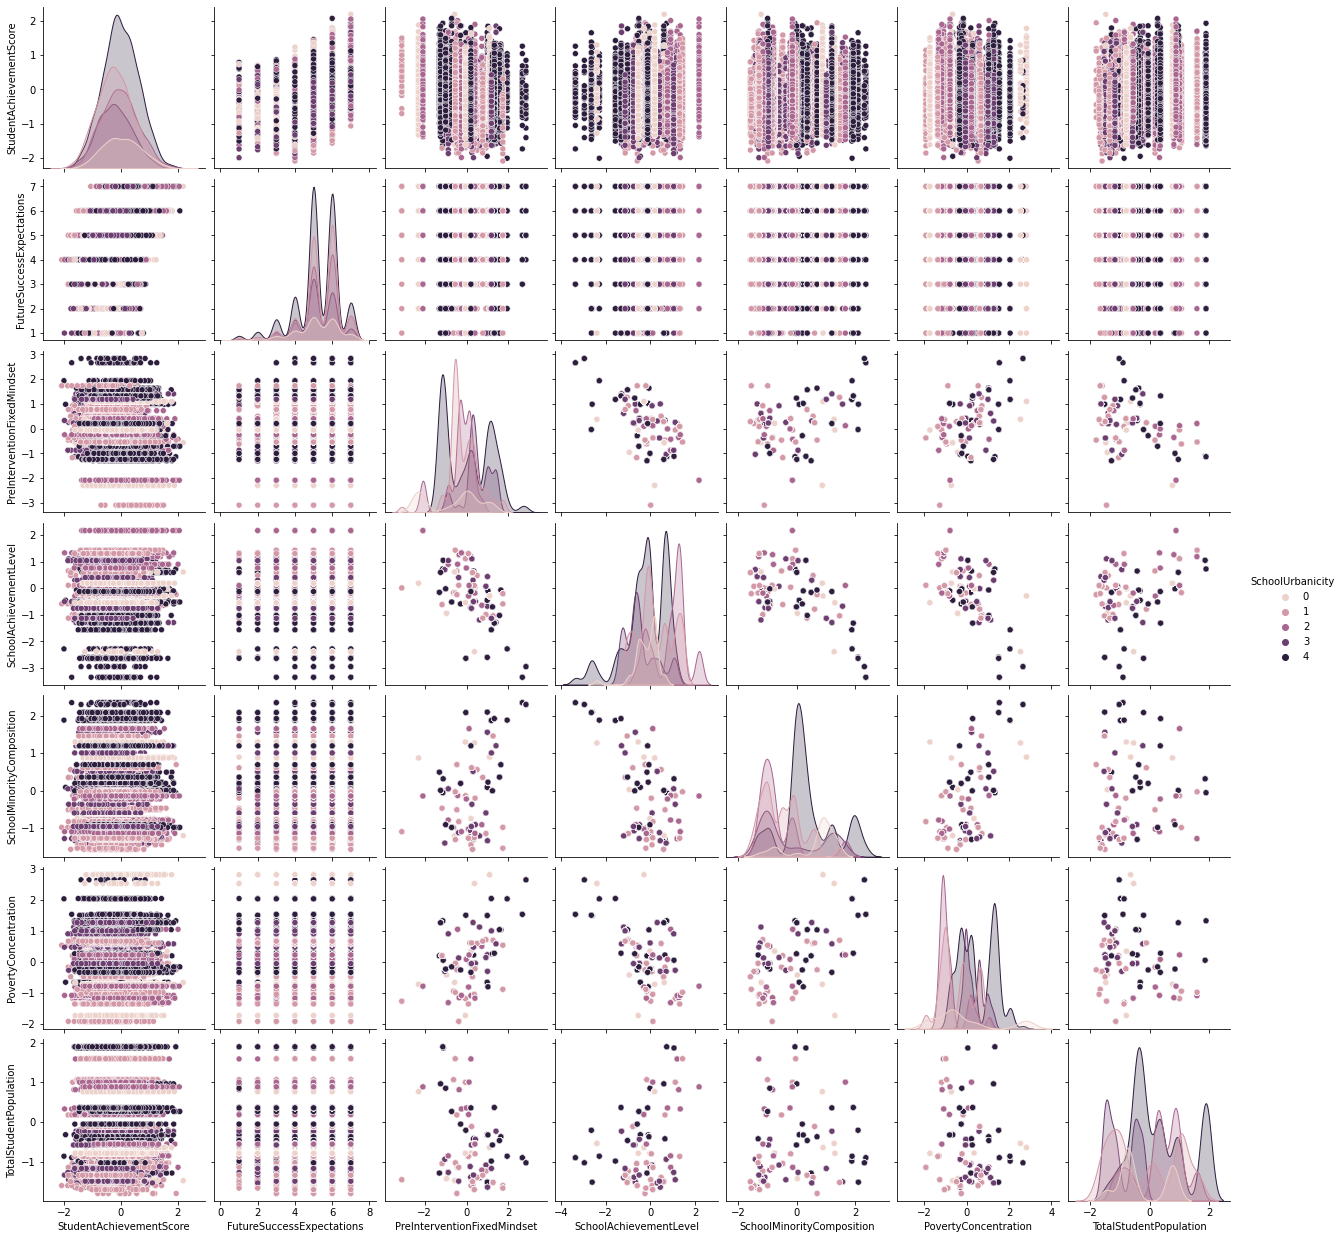

In [25]:
# Pairplot with hue for a categorical variable, e.g., 'C1' (student race/ethnicity)
sns.pairplot(data, vars=continuous_vars, hue='SchoolUrbanicity')
plt.show()

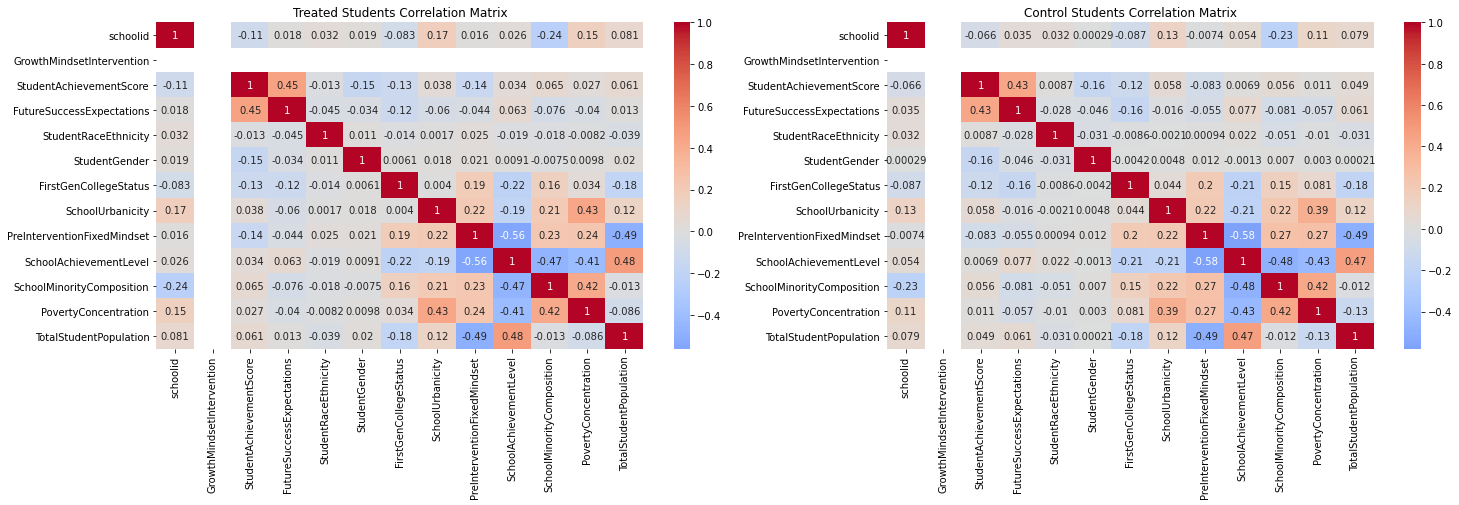

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Split data into treated and control groups
treated_data = data[data['GrowthMindsetIntervention'] == 1]
control_data = data[data['GrowthMindsetIntervention'] == 0]

# Calculate correlation matrices
treated_corr = treated_data.corr()
control_corr = control_data.corr()

# Plot heatmaps
fig, ax = plt.subplots(1, 2, figsize=(24, 6))

sns.heatmap(treated_corr, annot=True, cmap='coolwarm', center=0, ax=ax[0])
ax[0].set_title('Treated Students Correlation Matrix')

sns.heatmap(control_corr, annot=True, cmap='coolwarm', center=0, ax=ax[1])
ax[1].set_title('Control Students Correlation Matrix')

plt.show()

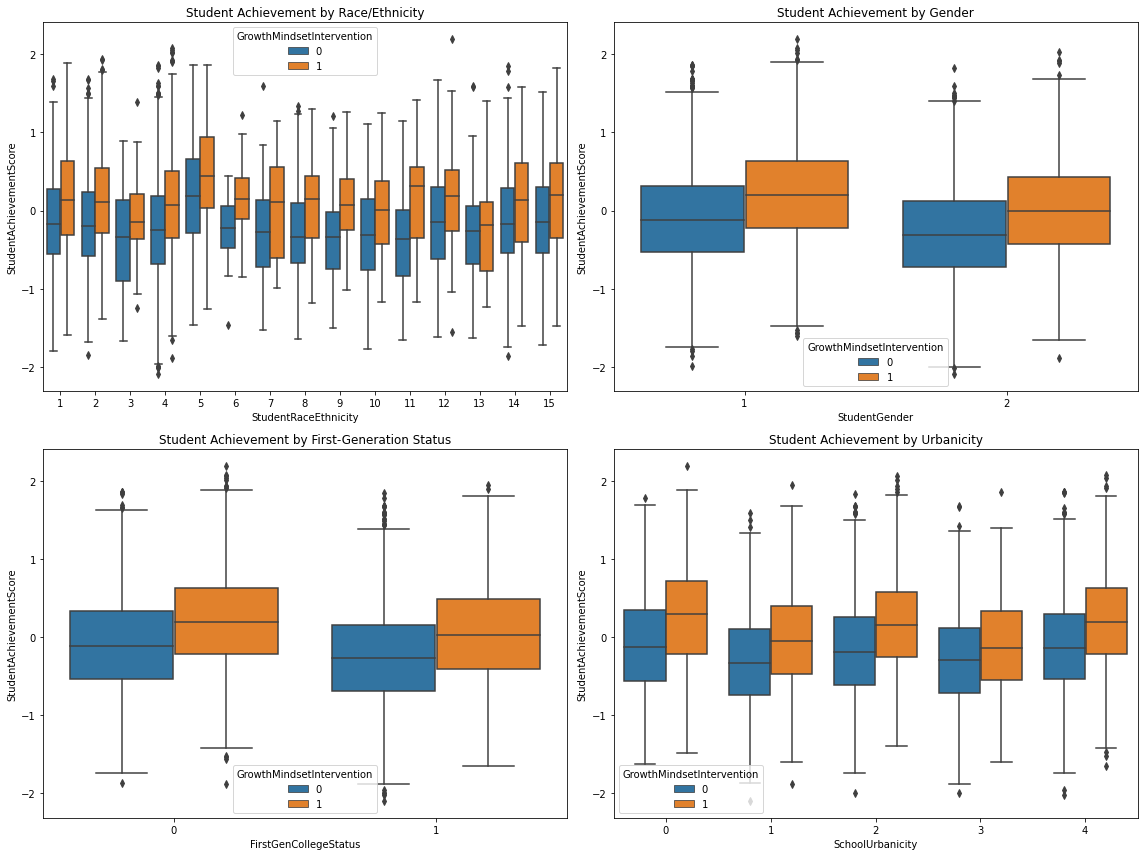

In [30]:

# Box plots for categorical variables
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.boxplot(x='StudentRaceEthnicity', y='StudentAchievementScore', hue='GrowthMindsetIntervention', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Student Achievement by Race/Ethnicity')

sns.boxplot(x='StudentGender', y='StudentAchievementScore', hue='GrowthMindsetIntervention', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Student Achievement by Gender')

sns.boxplot(x='FirstGenCollegeStatus', y='StudentAchievementScore', hue='GrowthMindsetIntervention', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Student Achievement by First-Generation Status')

sns.boxplot(x='SchoolUrbanicity', y='StudentAchievementScore', hue='GrowthMindsetIntervention', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Student Achievement by Urbanicity')

plt.tight_layout()
plt.show()


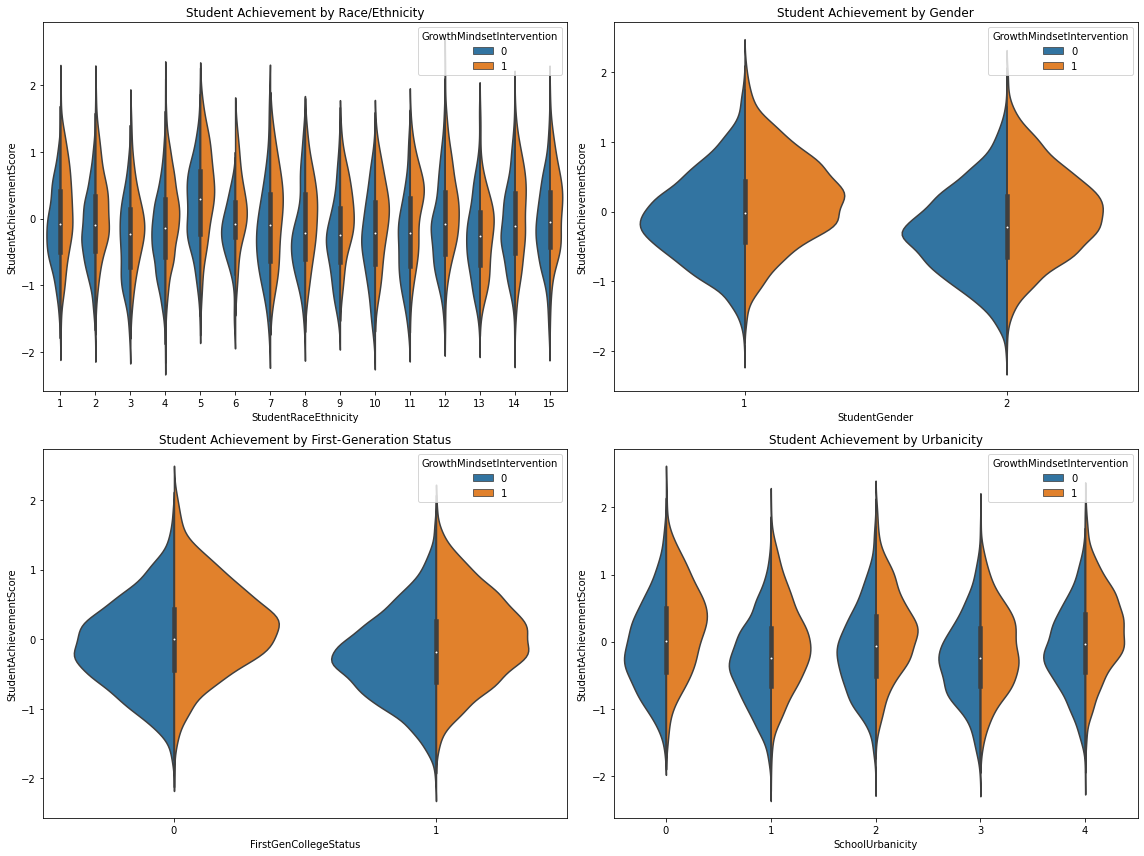

In [31]:

# Violin plots for categorical variables
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.violinplot(x='StudentRaceEthnicity', y='StudentAchievementScore', hue='GrowthMindsetIntervention', data=data, split=True, ax=axes[0, 0])
axes[0, 0].set_title('Student Achievement by Race/Ethnicity')

sns.violinplot(x='StudentGender', y='StudentAchievementScore', hue='GrowthMindsetIntervention', data=data, split=True, ax=axes[0, 1])
axes[0, 1].set_title('Student Achievement by Gender')

sns.violinplot(x='FirstGenCollegeStatus', y='StudentAchievementScore', hue='GrowthMindsetIntervention', data=data, split=True, ax=axes[1, 0])
axes[1, 0].set_title('Student Achievement by First-Generation Status')

sns.violinplot(x='SchoolUrbanicity', y='StudentAchievementScore', hue='GrowthMindsetIntervention', data=data, split=True, ax=axes[1, 1])
axes[1, 1].set_title('Student Achievement by Urbanicity')

plt.tight_layout()
plt.show()


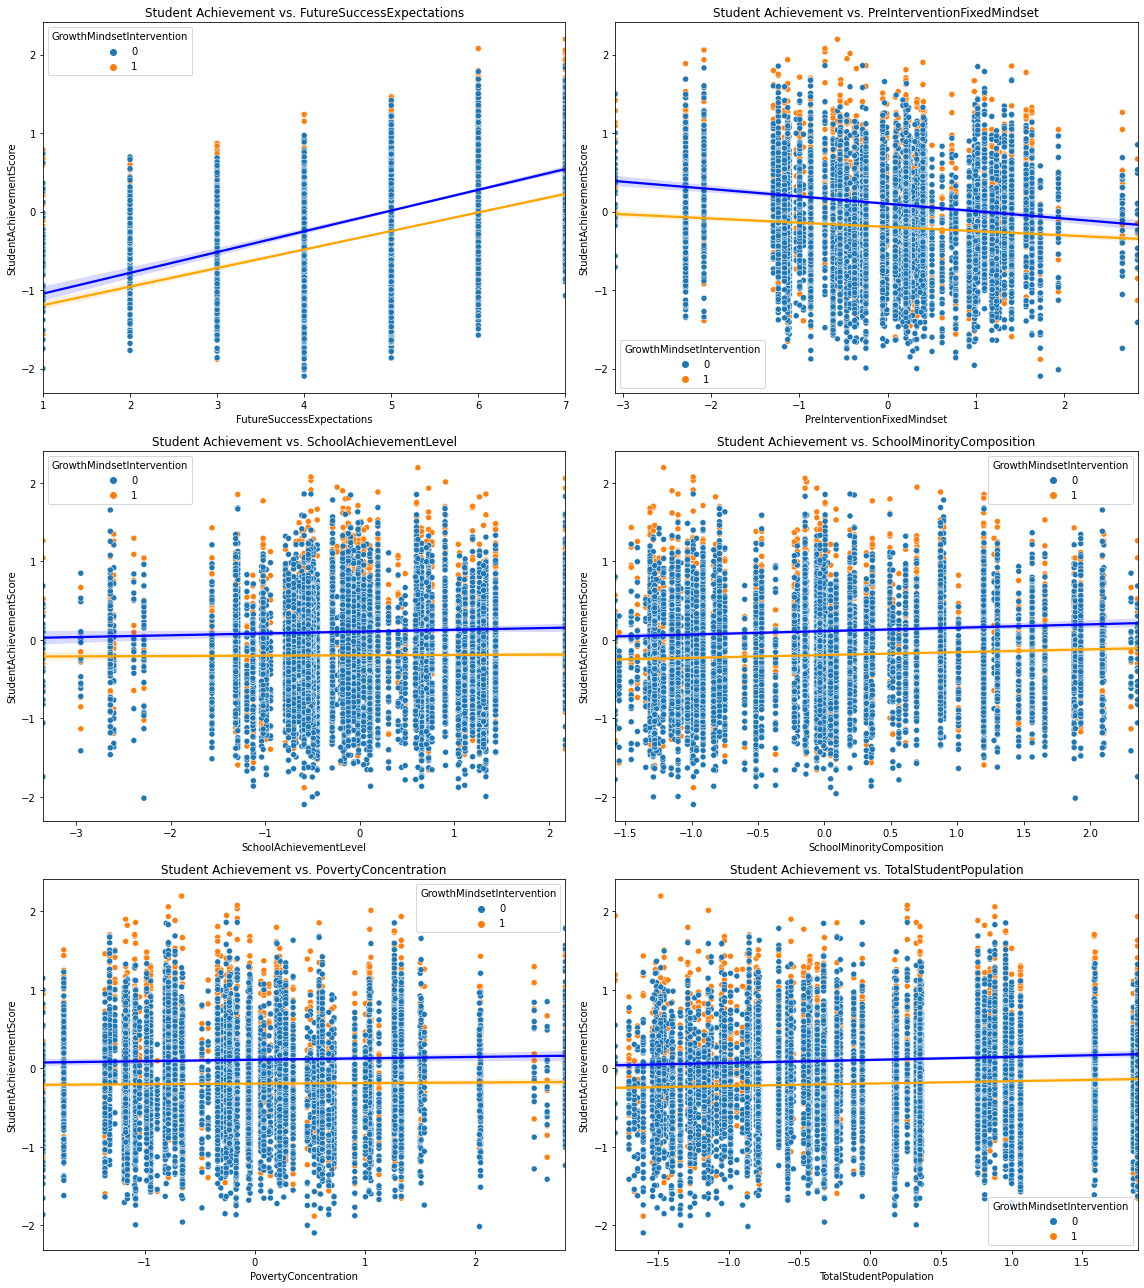

In [42]:
treatment_col = 'GrowthMindsetIntervention'
treated_data = data[data[treatment_col]==1]
control_data = data[data[treatment_col]==0]

# Scatter plots with regression lines for continuous variables
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

sns.scatterplot(x='FutureSuccessExpectations', y='StudentAchievementScore', hue=treatment_col, data=data, ax=axes[0, 0])
sns.regplot(x='FutureSuccessExpectations', y='StudentAchievementScore', data=treated_data, scatter=False, ax=axes[0, 0], color='blue')
sns.regplot(x='FutureSuccessExpectations', y='StudentAchievementScore', data=control_data, scatter=False, ax=axes[0, 0], color='orange')
axes[0, 0].set_title('Student Achievement vs. FutureSuccessExpectations')

sns.scatterplot(x='PreInterventionFixedMindset', y='StudentAchievementScore', hue=treatment_col, data=data, ax=axes[0, 1])
sns.regplot(x='PreInterventionFixedMindset', y='StudentAchievementScore', data=treated_data, scatter=False, ax=axes[0, 1], color='blue')
sns.regplot(x='PreInterventionFixedMindset', y='StudentAchievementScore', data=control_data, scatter=False, ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Student Achievement vs. PreInterventionFixedMindset')

sns.scatterplot(x='SchoolAchievementLevel', y='StudentAchievementScore', hue=treatment_col, data=data, ax=axes[1, 0])
sns.regplot(x='SchoolAchievementLevel', y='StudentAchievementScore', data=treated_data, scatter=False, ax=axes[1, 0], color='blue')
sns.regplot(x='SchoolAchievementLevel', y='StudentAchievementScore', data=control_data, scatter=False, ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Student Achievement vs. SchoolAchievementLevel')

sns.scatterplot(x='SchoolMinorityComposition', y='StudentAchievementScore', hue=treatment_col, data=data, ax=axes[1, 1])
sns.regplot(x='SchoolMinorityComposition', y='StudentAchievementScore', data=treated_data, scatter=False, ax=axes[1, 1], color='blue')
sns.regplot(x='SchoolMinorityComposition', y='StudentAchievementScore', data=control_data, scatter=False, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Student Achievement vs. SchoolMinorityComposition')

sns.scatterplot(x='PovertyConcentration', y='StudentAchievementScore', hue=treatment_col, data=data, ax=axes[2, 0])
sns.regplot(x='PovertyConcentration', y='StudentAchievementScore', data=treated_data, scatter=False, ax=axes[2, 0], color='blue')
sns.regplot(x='PovertyConcentration', y='StudentAchievementScore', data=control_data, scatter=False, ax=axes[2, 0], color='orange')
axes[2, 0].set_title('Student Achievement vs. PovertyConcentration')

sns.scatterplot(x='TotalStudentPopulation', y='StudentAchievementScore', hue=treatment_col, data=data, ax=axes[2, 1])
sns.regplot(x='TotalStudentPopulation', y='StudentAchievementScore', data=treated_data, scatter=False, ax=axes[2, 1], color='blue')
sns.regplot(x='TotalStudentPopulation', y='StudentAchievementScore', data=control_data, scatter=False, ax=axes[2, 1], color='orange')
axes[2, 1].set_title('Student Achievement vs. TotalStudentPopulation')

plt.tight_layout()
plt.show()
